1. Import các thư viện cần thiết

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


2. Thiết lập và huấn luyện mô hình

In [ ]:
import tensorflow as tf
import numpy as np

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Reshape data để thêm chiều kênh cho CNN (28, 28, 1)
    X_train = X_train[..., np.newaxis]  # Từ (60000, 28, 28) thành (60000, 28, 28, 1)
    X_test = X_test[..., np.newaxis]    # Từ (10000, 28, 28) thành (10000, 28, 28, 1)

    # Create a CNN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Tắt 20% nơ-ron ngẫu nhiên
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compiling and optimizing model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Các tùy chọn khác (bạn có thể thử nếu muốn)
    # model.compile(optimizer='sgd',
    #               loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    #               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train, y_train, epochs=10,batch_size=128, 
                        validation_data=(X_test, y_test))

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print("Validation Loss:", val_loss)
    print("Validation Accuracy:", val_acc)

    # Saving the model
    model.save('../handwritten_digits.keras')
else:
    # Load the model
    model = tf.keras.models.load_model('../handwritten_digits.keras',
                                       custom_objects={'softmax_v2': tf.keras.activations.softmax})

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8389 - loss: 0.5436 - val_accuracy: 0.9762 - val_loss: 0.0737
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9759 - loss: 0.0774 - val_accuracy: 0.9854 - val_loss: 0.0453
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9851 - loss: 0.0496 - val_accuracy: 0.9858 - val_loss: 0.0410
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9887 - val_loss: 0.0348
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9884 - val_loss: 0.0334
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9926 - loss: 0.0227 - val_accuracy: 0.9911 - val_loss: 0.0288
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9943 - loss: 0.0180 - val_accuracy: 0.9908 - val_loss: 0.0303
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accu

3. Vẽ biểu đồ accuracy và loss

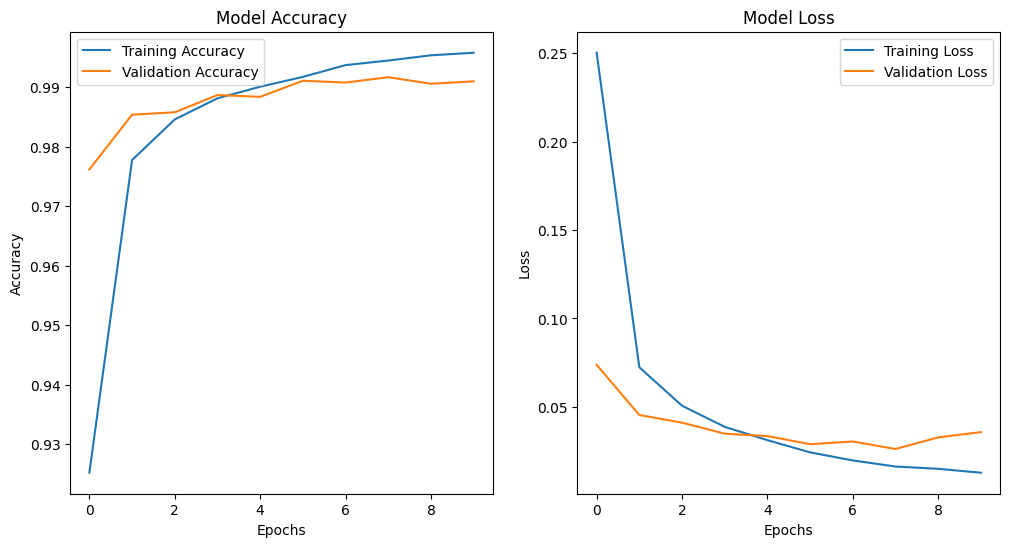

In [7]:
# Plotting accuracy and loss
# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
